Stochastic Gradient Descent:
    
1. True (or pure) SGD

- Uses 1 sample at a time to compute the gradient and update weights.

- Very noisy updates, but can escape local minima.



2. Mini-Batch SGD

- Uses a small batch of samples (more than 1, less than full dataset) per update.

- Reduces noise compared to pure SGD, but still faster than full batch GD.It converge quickly than full batch SGD


- Widely used in deep learning (batch sizes like 32, 64, 128).


3. full batch GD 
- Regular linear regression that takes all samples per update
- conerge slowly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
# load the dataset
housing=fetch_california_housing()
x,y=housing.data,housing.target

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
x,y

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [5]:
x.shape,y.shape

((20640, 8), (20640,))

In [6]:
type(housing)

sklearn.utils._bunch.Bunch

In [7]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
housing['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

can you convert the above into data frame?

In [9]:
type(housing)

sklearn.utils._bunch.Bunch

In [10]:
data=pd.DataFrame(data=x,columns=housing.feature_names)
data['MedHouseVal']=y

In [11]:
data.head() # to display first 5 rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
data.isnull().sum() # check for missing values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

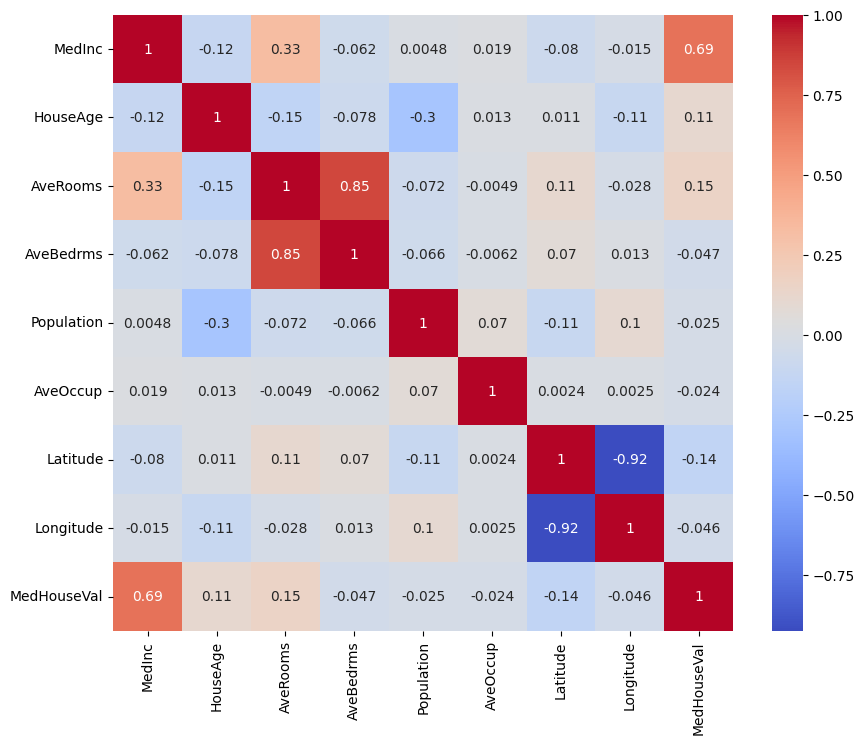

In [13]:
# finding the correlation betweeen the features and targets
corr_matrix = data.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

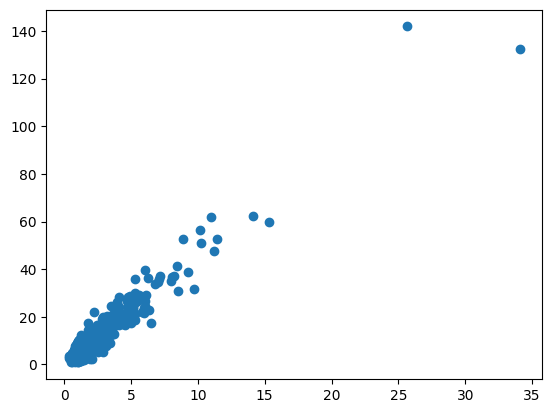

In [14]:
plt.scatter(data.AveBedrms,data.AveRooms)
plt.show()

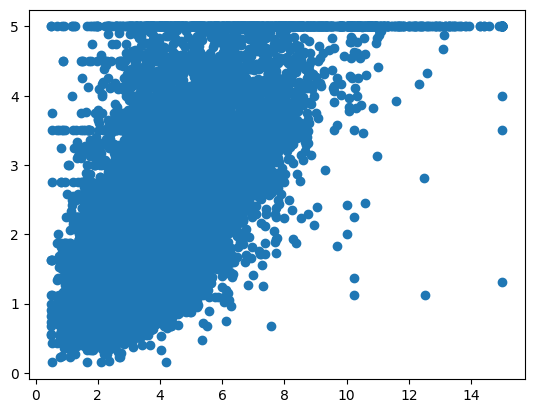

In [15]:
plt.scatter(data.MedInc,data.MedHouseVal)
plt.show()

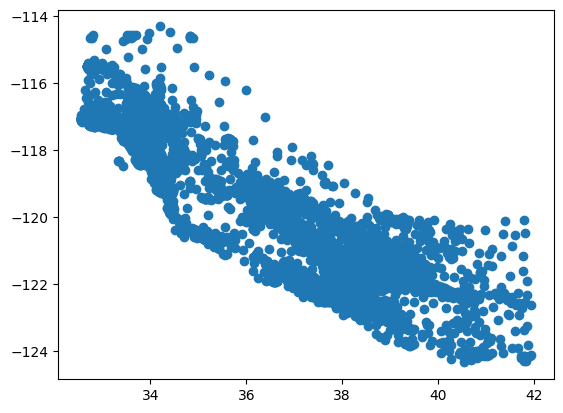

In [16]:
plt.scatter(data.Latitude,data.Longitude)
plt.show()

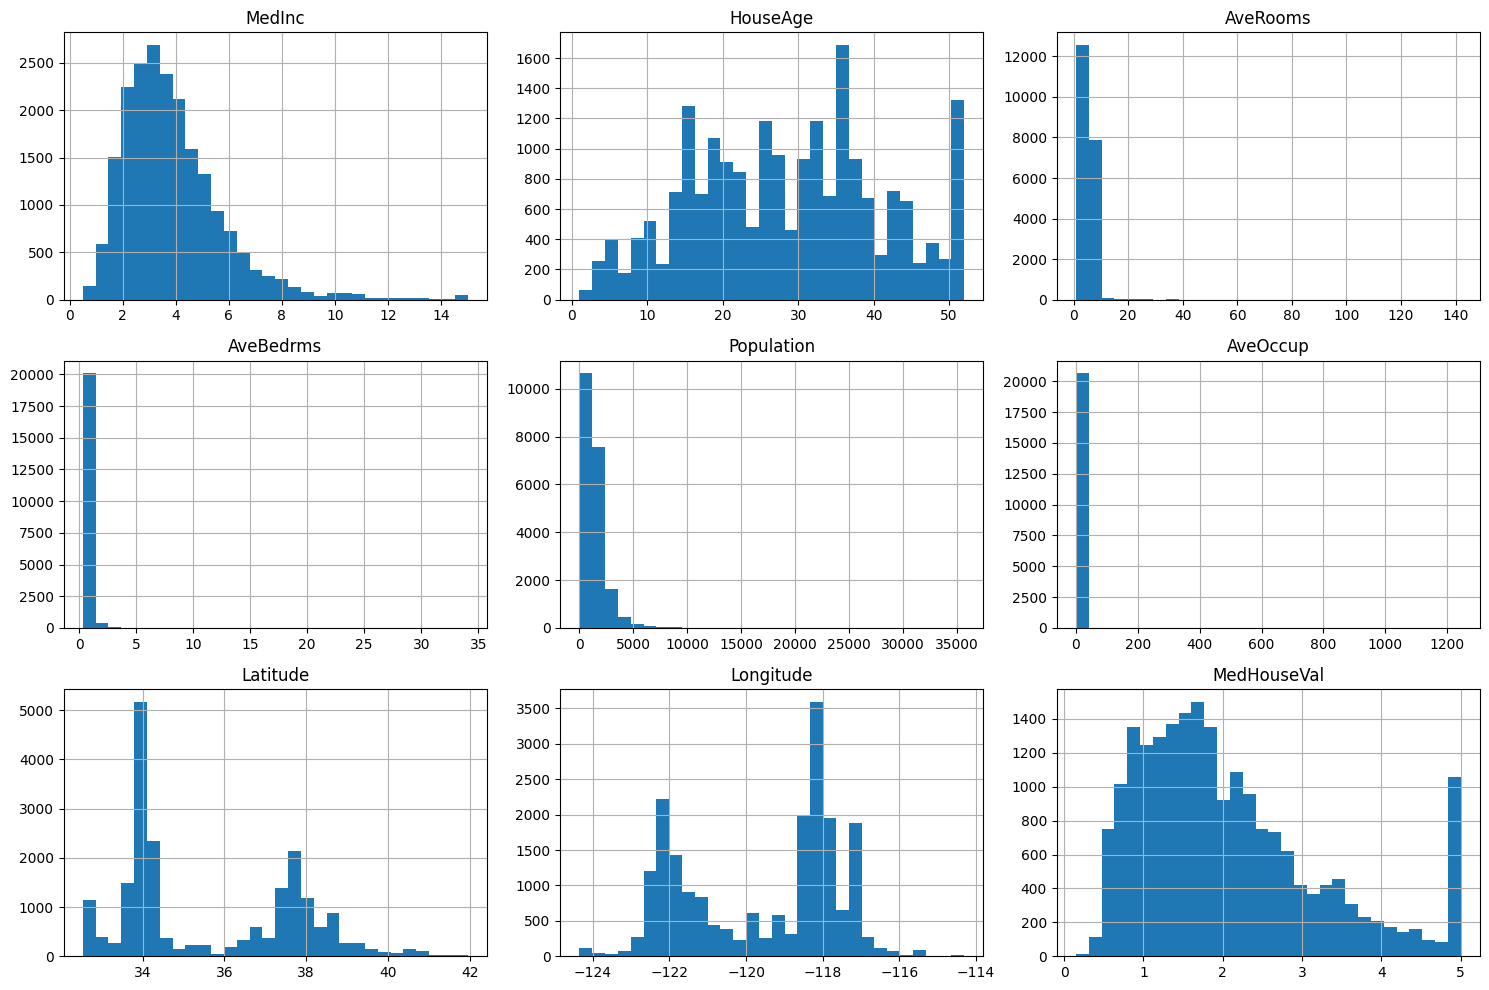

In [17]:
# plotting the distribution using the histogram
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
# standardizing the features using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Create and train the SGD Regressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train_scaled, y_train)

SGDRegressor()

In [43]:
# Make predictions on the test set
y_pred = sgd_regressor.predict(X_test_scaled)
y_pred

In [44]:
# r2 score
r2Score = r2_score(y_test, y_pred)
print("R2 Score: ", r2Score)

R2 Score:  0.5835222709175498


In [45]:
# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5457561554270236


In [46]:
# rmse
rmse = np.sqrt(mse)
print(rmse)

0.7387531085735095


In [47]:
0.7387531085735095*100000

73875.31085735095

In [48]:
# Print the coefficients and intercept
print("Coefficients:", sgd_regressor.coef_)
print("Intercept:", sgd_regressor.intercept_)

Coefficients: [ 0.8509113   0.11942254 -0.32635162  0.32138658  0.00680849 -0.05419949
 -0.88720947 -0.87442471]
Intercept: [2.07472137]


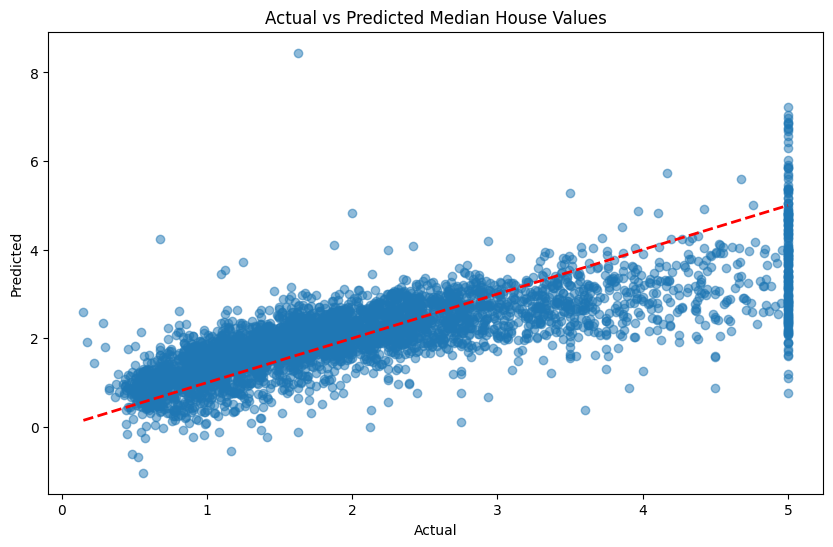

In [49]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.plot([x1, x2], [y1, y2], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Median House Values")
plt.show()

both x values and y values will have same min --->bottom-left of plot

both x values and y values will have same max --->top-right of plot

two plot gets connected to from a line passing at origin. since x=y

In [ ]:
#Another house price prediction using OLS

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df= fetch_california_housing()

In [5]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
type(df)

sklearn.utils._bunch.Bunch

In [12]:
x,y=df.data,df.target

In [14]:
x.shape,y.shape

((20640, 8), (20640,))

In [23]:
dataset=pd.DataFrame(data=x,columns=df.feature_names)

In [24]:
dataset['Price']=y

In [25]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [31]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]


In [32]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
print(mse)

[-0.48485857 -0.62249739 -0.64621047 -0.5431996  -0.49468484]
